In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
from cProfile import label


In [66]:

# Global variables
mu0 = 4*(np.pi)*10**(-7)  # SI unit
I=0.5
w=(4.5*10**-3)/2
a=(150*10**-3)/2
x = 0
y = 0
z0=100*10**-3
#z = np.linspace(-z0,z0, 1000)
N=1
#L=10
d=80*10**(-3) #helmholtz condition 

In [67]:
def Bz_single_layer_single_turn(I, x, y, z, a):
    C = (mu0*I)/(np.pi)  # in SI
    alpha_sq = a**2 + x**2 + y**2 + z**2 - 2*a*np.sqrt(x**2 + y**2)
    beta_sq = a**2 + x**2 + y**2 + z**2 + 2*a*np.sqrt(x**2 + y**2)
    k_sq = 1 - (alpha_sq/beta_sq)
    temp = (C/(2*alpha_sq*np.sqrt(beta_sq)))*((a**2-x**2-y**2-z**2) * sps.ellipe(k_sq) + alpha_sq*sps.ellipk(k_sq))
    return temp

In [68]:
def cal_Bz_single_layer_single_turn(I, x, y, z, a):
    Bz = []
    for i in range(len(z)):
        Bz.append(Bz_single_layer_single_turn(I, x, y, z[i], a)*10**4)
    return Bz

In [69]:
def cal_Bz_helmoltz(I, x, y, z, L, N, a, w, d):
    Bz = []  # Stores the value of Bz
    for i in range(len(z)):
        Bqz = 0
        for k in range(L):
            for j in range(N):
                Bqz = Bqz + Bz_single_layer_single_turn(I, x, y, z[i]-(d+w+(k*2*w)), a+w+(j*2*w)) + Bz_single_layer_single_turn(I, x, y, z[i]+(d+w+(k*2*w)), a+w+(j*2*w))
        Bz.append(Bqz*10**4)
    return Bz


In [70]:
def plateau_function1(xc,p1,delb,x_o,k):
    #if (xc<x_o):
        return p1+delb*(1-np.exp(-(k)*(xc-x_o)))
    #else:
        return p1+delb*(1-np.exp(k*(xc-x_o)))

In [71]:
def plateau_function2(xc2,p2,delb2,x_o2,k2):
    if (xc2<0):
        return p2+delb2*(1-np.exp(-(k2)*(xc2-x_o2)))
    else:
        return p2+delb2*(1-np.exp(k2*(xc2+x_o2)))

In [72]:
#parameters of the plateau function
min_0=3.0
max_0=4.25
k=1.25/(30*10**(-3))
x_o=0

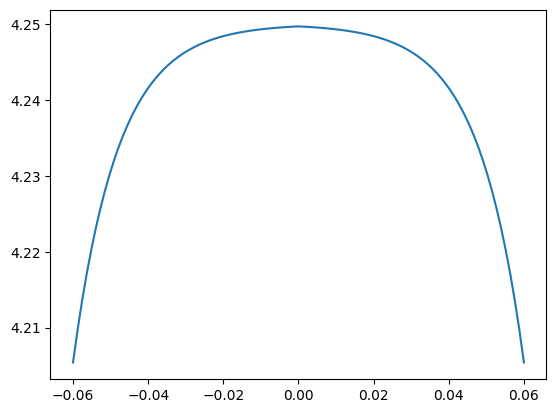

In [73]:
x_values=np.linspace(-0.06,0.06,100)
y_values=[]
for i in range(len(x_values)):
    y_values.append(plateau_function2(x_values[i],3.0,1.25,-0.1,2*(1.25/0.03)))
plt.plot(x_values,y_values)

In [74]:
len(y_values)

100

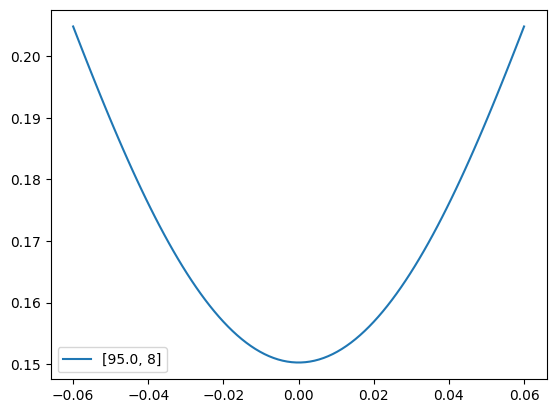

In [82]:
z0=0.055
m=np.linspace(8,8,1)
zt=x_values #np.linspace(-z0,z0,100)
d=np.linspace(95,95,1)
for j in range(len(m)):
    for i in range(0,len(d)):
        Bq=[]
        Bq=cal_Bz_helmoltz(I,x,y,zt,int(m[j]),N,a,w,d[i]*10**(-3))
        plt.plot(zt,Bq,label=[d[i],int(m[j])])
        #plt.xticks(np.arange(-z0,z0,0.02))
        plt.legend()


In [76]:
len(Bq)

100

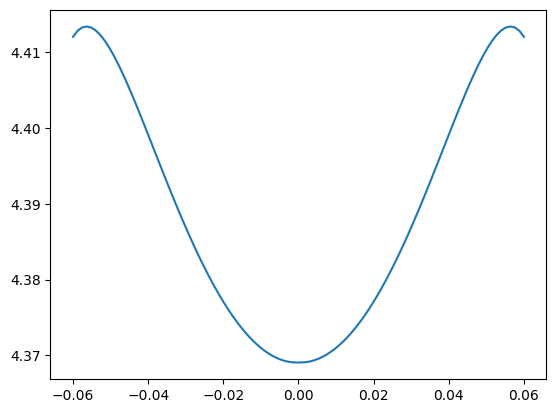

In [77]:
SumB=[]
for i in range(len(Bq)):
    SumB.append(Bq[i]+y_values[i])
plt.plot(x_values,SumB,label=[60,5])


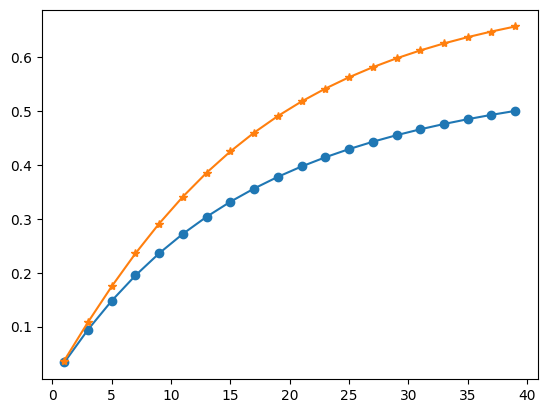

In [78]:
# For constant radius simulating different loop size radius 120mm
# data of interest value at 0.055 and value at 0.00
#with helmholtz condition d=a/2
a=100*10**(-3)
d=70*10**(-3)
minB=[]
maxB=[]
lp=[]
z=np.linspace(-0.06,0.06,100)
for i in range(1,40,2):
    bz=[]
    bz=cal_Bz_helmoltz(I,x,y,z,i,N,a,w,d)
    minB.append(min(bz))
    maxB.append(max(bz))
    lp.append(i)
plt.plot(lp,minB,marker='o')    
plt.plot(lp,maxB,marker='*')

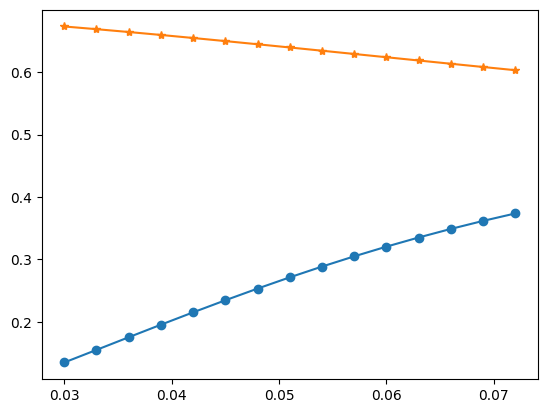

In [79]:
#simulating for 20 loops for varying radius of the loop
#d is taken as equal to the helmholtz condition R
L=20
a=60*10**(-3)/2
d=60*10**(-3)
minB2=[]
maxB2=[]
at=[]
z=np.linspace(-0.06,0.06,100)
for i in range(15):
    bz=[]
    ar=a+(i*3*10**(-3))
    bz=cal_Bz_helmoltz(I,x,y,z,L,N,ar,w,d)
    minB2.append(min(bz))
    maxB2.append(max(bz))
    at.append(ar)
plt.plot(at,minB2,marker='o')
plt.plot(at,maxB2,marker='*')    
    

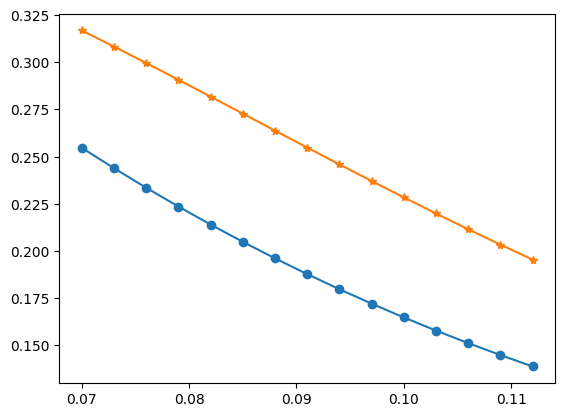

In [80]:

L=10
a=200*10**(-3)/2
d=70*10**(-3)
minB3=[]
maxB3=[]
dt=[]
z=np.linspace(-0.06,0.06,100)
for i in range(15):
    bz=[]
    dr1=d+(i*3*10**(-3))
    bz=cal_Bz_helmoltz(I,x,y,z,L,N,a,w,dr1)
    minB3.append(min(bz))
    maxB3.append(max(bz))
    dt.append(dr1)
plt.plot(dt,minB3,marker='o')
plt.plot(dt,maxB3,marker='*')  